<a href="https://colab.research.google.com/github/nirmal-rawal/ML-Learn-And-Build/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline  import Pipeline
from matplotlib import  pyplot as plt

In [ ]:
#y=0.8x ^2 +0.9x + 2
X=6 * np.random.rand(200,1)-3
y= 0.8 * X ** 2 + 0.9 * X +2 + np.random.randn(200,1)

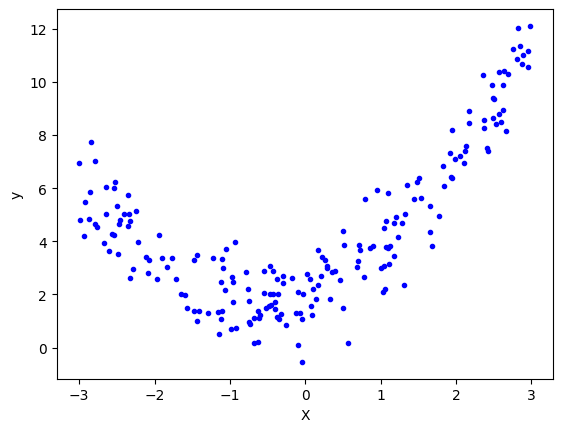

In [ ]:
plt.plot(X,y,'b. ')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# **Simple Linear Regression **

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.34917725112306686

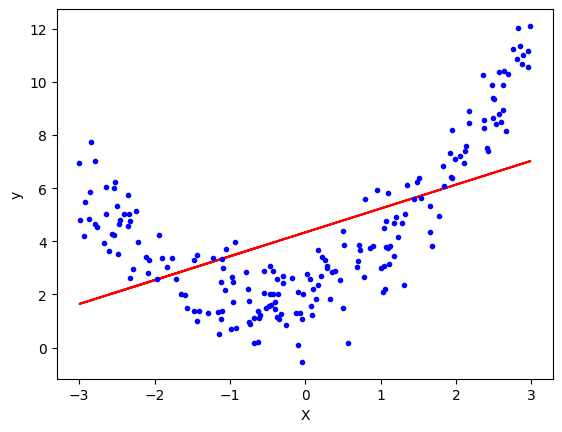

In [ ]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# ***Polynomial Regressiion ***

In [ ]:
#apply polynomial regression with degree 2
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [ ]:
print(x_train[0])
print(x_train_poly[0])


[-2.5688893]
[ 1.         -2.5688893   6.59919226]


In [ ]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)


LinearRegression()

In [ ]:
y_pred=lr.predict(x_test_poly)
r2_score(y_test,y_pred)

0.9296719209455837

In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

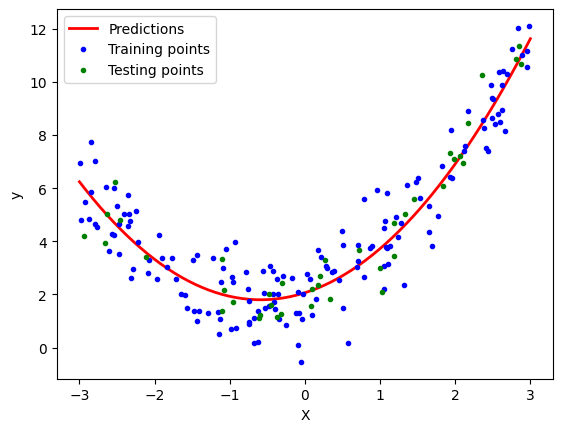

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


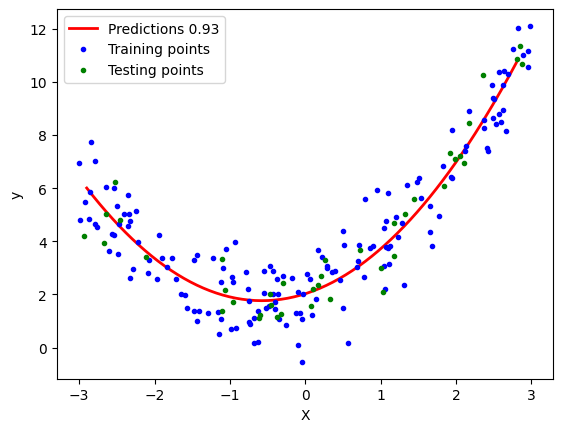

In [ ]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

x_test_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(x_train_poly,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(x_test_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **3D polynomial Regresion **

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
#using simple linear regression o
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:

import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()


In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
#now using polynomial regression

poly = PolynomialFeatures(degree=15)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
X_multi_trans.shape

(100, 136)

In [ ]:

lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()